In [180]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = '5Av1EMy2LELvBBqUCpCg'
data = quandl.get_table('WIKI/PRICES',ticker='KO' ,
                        qopts = { 'columns': ['date', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2017-1-31' }, paginate=True)


data=data.reindex(index=data.index[::-1])
data

,date,adj_close
None,,
271,2016-01-04,40.047007
270,2016-01-05,40.188683
269,2016-01-06,39.971447
268,2016-01-07,39.310293
267,2016-01-08,39.206398
...,...,...
4,2017-01-25,41.082512
3,2017-01-26,40.780148
2,2017-01-27,40.429015


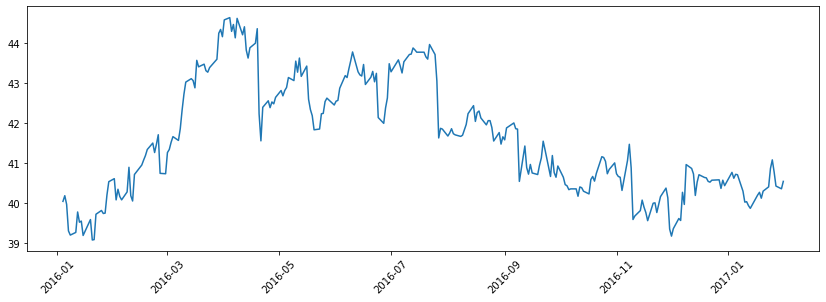

In [181]:
plt.figure(figsize=(14.2,4.5))
plt.plot(data['date'],data['adj_close'])
plt.xticks(rotation=45)
plt.show()

In [183]:
#Calculating macd and signal line

# Short term
sema=data.ewm(span=12,adjust=False).mean()

#Long term
lema=data.ewm(span=26,adjust=False).mean()

#MACD
macd=sema-lema

#Signal

signal=macd.ewm(span=9,adjust=9).mean()




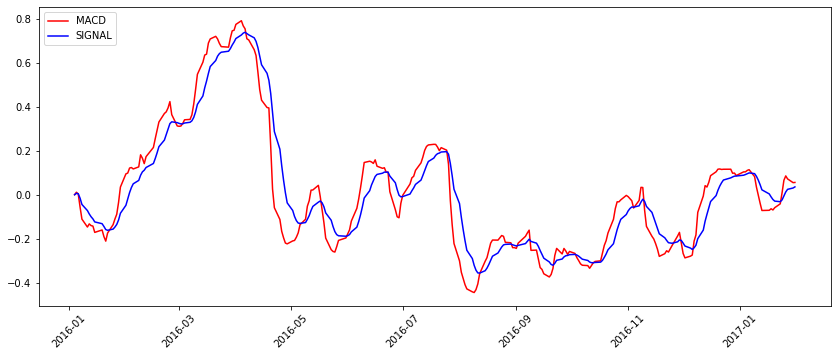

In [184]:
plt.figure(figsize=(14.2,5.5))
plt.plot(data['date'],macd,label='MACD',color='red')
plt.plot(data['date'],signal,label='SIGNAL',color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

In [185]:
data['MACD']=macd
data['SIGNAL']=signal
data.head()

,date,adj_close,MACD,SIGNAL
None,,,,
271,2016-01-04,40.047007,0.000000,0.000000
270,2016-01-05,40.188683,0.011302,0.006279
269,2016-01-06,39.971447,0.002698,0.004811
268,2016-01-07,39.310293,-0.056815,-0.016065
267,2016-01-08,39.206398,-0.111082,-0.044330


In [186]:
#when to buy and cell asset

def bs(signal):
    b=[]
    s=[]
    flag=-1
    
    
    for i in range(0,len(signal)):
        if signal['MACD'][i]>signal['SIGNAL'][i]:
            s.append(np.nan)
            if flag!=1:
                b.append(signal['adj_close'][i])
                flag=1
            else:
                b.append(np.nan) 
        elif signal['MACD'][i]<signal['SIGNAL'][i]:
            b.append(np.nan)
            if flag!=0:
                s.append(signal['adj_close'][i])
                flag=0
            else:
                s.append(np.nan)
        else:
            s.append(np.nan)
            b.append(np.nan)
            
    return(b[::-1],s[::-1])
    
    
    



In [187]:
a=bs(data)
data.head()
data['buy_signal']=a[0]
data['sell_signal']=a[1]



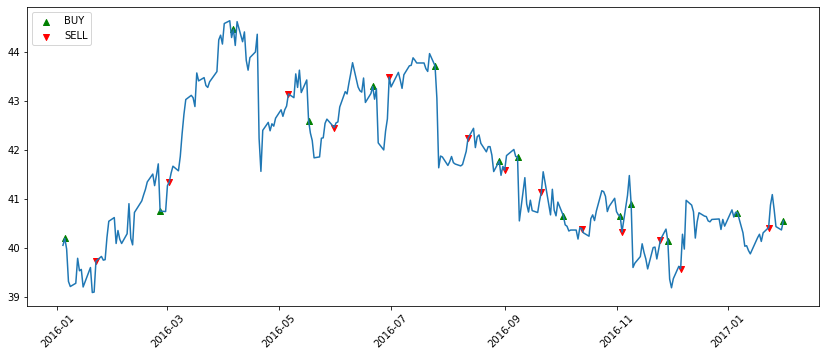

In [188]:
plt.figure(figsize=(14.2,5.5))
plt.scatter(data['date'],data['buy_signal'],label='BUY',color='green',marker='^')
plt.scatter(data['date'],data['sell_signal'],label='SELL',color='red',marker='v')
# plt.plot(data['date'],macd,label='MACD',color='red')
# plt.plot(data['date'],signal,label='SIGNAL',color='blue')
plt.plot(data['date'],data['adj_close'])
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()
